In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import load_model
from keras.models import save_model
from cv2 import imread
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
import numpy as np

In [8]:
def create_Model():
    model = Sequential()
    model.add(Conv2D(16,(5,5),padding='same',activation='tanh',input_shape=(80,80,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(48,(3,3),activation='tanh',padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3,3),activation='tanh',padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(2,2),activation='tanh',padding='same'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(10,activation='linear'))
    model.compile(loss='mean_squared_error' ,optimizer='adam')
    return model

In [9]:
def train(X_train, y_train):
    model = create_Model()
    model.fit(X_train,y_train,epochs=20,batch_size=128)
    model.save('landmark.h5')

In [10]:
def test(X_test, y_test):
    try:
        model = load_model('landmark.h5')
        pred = model.predict(X_test, batch_size=100,)
        print(model.evaluate(X_test, y_test, batch_size=100))
        return pred
    except:
        print('Not trained')

In [11]:
def make_data():
    X_train=[]
    y_train=[]
    X_test=[]
    y_test=[]
    file=open('new_training.txt','r')
    for line in file:
        line=line.strip()
        a=line.split()
        path=a[0]
        image=imread(path)
        X_train.append(image)
        y_train.append(list(map(float,a[1:11])))
    file.close()
    file=open('new_testing.txt','r')
    for line in file:
        line=line.strip()
        a=line.split()
        path=a[0]
        image=imread(path)
        X_test.append(image)
        y_test.append(list(map(float,a[1:11])))
    file.close()
    return np.asarray(X_train),np.asarray(y_train),np.asarray(X_test),np.asarray(y_test)

(10000, 80, 80, 3)
[ 34.32  47.28  40.4   34.    45.04  34.8   36.24  46.    50.8   52.08]
Epoch 1/20
10000/10000 [==============================] - 92s 9ms/step - loss: 145.0326
Epoch 2/20
10000/10000 [==============================] - 90s 9ms/step - loss: 85.8666
Epoch 3/20
10000/10000 [==============================] - 90s 9ms/step - loss: 67.3886
Epoch 4/20
10000/10000 [==============================] - 92s 9ms/step - loss: 50.9403
Epoch 5/20
10000/10000 [==============================] - 90s 9ms/step - loss: 43.9759
Epoch 6/20
10000/10000 [==============================] - 93s 9ms/step - loss: 37.6786
Epoch 7/20
10000/10000 [==============================] - 93s 9ms/step - loss: 36.4607
Epoch 8/20
10000/10000 [==============================] - 90s 9ms/step - loss: 34.8920
Epoch 9/20
10000/10000 [==============================] - 90s 9ms/step - loss: 34.6760
Epoch 10/20
10000/10000 [==============================] - 91s 9ms/step - loss: 34.8240
Epoch 11/20
10000/10000 [============

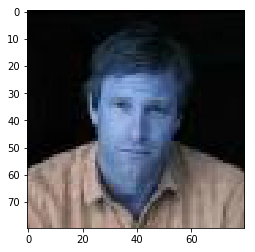

In [12]:
X_train,y_train,X_test,y_test=make_data()
plt.imshow(X_train[0])
print(X_train.shape)
print(y_train[0])
train(X_train,y_train)

Not trained


None
